# Logistic Regression

Logistic Regression is a supervised machine learning algorithm that is used for the classification problems and predictive analysis. However, unlike the classification algorithm, logistic regression is strictly based on the concept of probability, and it is usually used to classify binary objects.

<img src="https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg" width="630" height="630"/>

### Comparison with linear regression:
We can call a logstic regression an extreme case of linear regression, but there are some clear differences between two. First, the predicted $y$ of a logistic regression lies within 0 and 1, whereas a linear regression can have a predicted $y$ exceedong this range. Also, the linear regression does not produce a probability, while a logistic regression does. In addition, the logistic regression uses a more complex cost function. This cost function can be defined as the "sigmoid function" or also known as the "logistic function" instead of a linear function.

$$
Sigmoid: \sigma(z) = \frac{1}{1 + e^{-z}}
$$

$$
Preactivation: z = \sum w_j x_j + bias
$$
Below is a graph of the sigmoid function:
<img src="https://miro.medium.com/max/1280/1*OUOB_YF41M-O4GgZH_F2rw.png" width="500" height="500"/>

### There are some general assumptions of the logistic regression:
1. Each example $(x, y)$ belongs to one of two complementary classes.
2. Each example is independent of each other.
3. We assume all examples are generated under the same distribution.
4. The probability of "given $x$ and predict the correct $y$", $p(y|x)$, is $\hat{y}$ if $y = 1$, and $p(y|x)$ is $1 - \hat{y}$ if $y = 0$. We want to maximize $\hat{y}$ when $y = 1$ and maximize $1 - \hat{y}$ when $y = 0$.

### Derivations and outcomes:
We assume a bernoulli distribution for $p(y|x)$. Then, $p(y|x) = \hat{y}^y(1 - \hat{y})^{1-y}$. We want to maximize $p(y|x)$ by maximizing $log(p(y|x))$, which is equivalent to minimizing $-log(p(y|x))$, also known as the cross entropy loss (CEL). The loss function is important to implement the algorithm.

$$
CEL = L(w, b; y) = -log(p(y|x)) = -ylog\hat{y} - (1-y)log(1-\hat{y})
$$

Then through partial derivatives, we finally obtain:
$$
\frac{\partial L}{\partial w_j} = [\sigma(w_j x_j + bias) − y]x_j = [\hat{y} - y]x_j
$$


$$
\frac{\partial L}{\partial b} = \sigma(w_j x_j + bias) − y = \hat{y} - y
$$


### Steps to train our neural network:
1. Randomly select $(x, y)$ from the training set.
2. Feed forward into the neural network.
3. Use gradient descent to update weights and bias (choose the learning rate $\alpha$):
   - $w_1 = w_1 - \alpha(\hat{y} - y)x_1$
   - $w_2 = w_2 - \alpha(\hat{y} - y)x_2$
   - ...
   - $b = b - \alpha(\hat{y} - y)$
4. Repeat step 1 to step 3 until desired loss in-sample is reached, or the maximum number of steps is reached.

---
# My Implementation on Social Network Ads Data

I choose the social netwrok ads data to implement the logistic regression. There are 4 predictor variables and 1 target variable.

### Predictor variables
1. User ID
2. Gender
3. Age
4. Estimated Salary

### Target variable
1. Purchased

My goal is to use gender, age and estimated salary to predict whether customers purchased or not after viewing the ads. "Purhcased" = 0 stands for "NOT purchased", and "Purchased" = 1 stands for "purchased".

---
# Libraries Used

The following packages are used to implement this algorithm.

1. [numpy](https://numpy.org/doc/)
2. [pandas](https://pandas.pydata.org/docs/)
3. [matplotlib](https://matplotlib.org/)

---
# Coding Part

Import necessary libraries.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 

In [27]:
df = pd.read_csv("Social_Network_Ads.csv")
df['Age'] = pd.to_numeric(df['Age'], downcast = 'float')
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], downcast = 'float')

In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


Let's take a look at some features of the diabetes dataset.

In [29]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.654999,69742.500000,0.357500
std,7.165832e+04,10.482878,34096.964844,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Plot the histograms of "Age", "EstimatedSalary" and "Purchased":

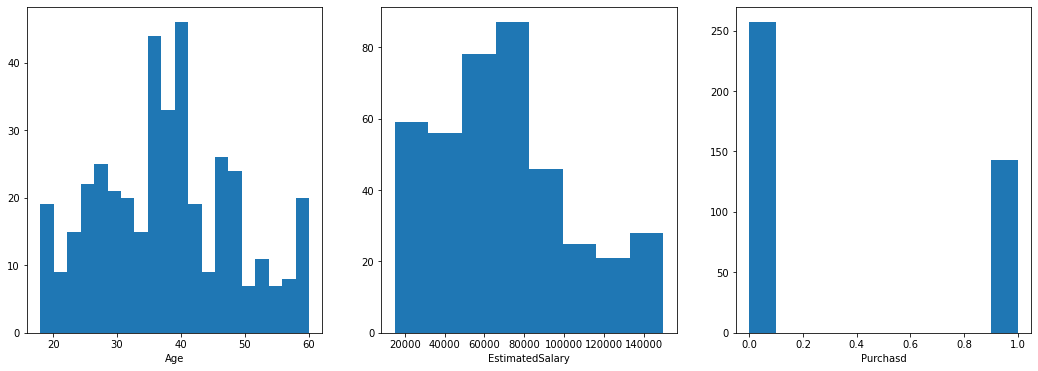

In [30]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
ax[0].hist(df.Age, bins = 20)
ax[0].set_xlabel("Age")
ax[1].hist(df.EstimatedSalary, bins = 8)
ax[1].set_xlabel("EstimatedSalary")
ax[2].hist(df.Purchased)
ax[2].set_xlabel("Purchasd")
plt.show()

Set X to be "Age" and "Estimated Salary". Set y to be "Purchased".

In [31]:
X = df[["Age", "EstimatedSalary"]].to_numpy()
Y = df["Purchased"].to_numpy()

### Feature Scaling or Min-Max Normalization
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

$$
x' = \frac{x - min(x)}{max(x) - min(x)}
$$

where x is an original value, x' is the normalized value.

In [32]:
X[:, 0] = (X[:, 0] - np.min(X[:, 0]))/(np.max(X[:, 0] - np.min(X[:, 0])))
X[:, 1] = (X[:, 1] - np.min(X[:, 1]))/(np.max(X[:, 1] - np.min(X[:, 1])))

Plot Age vs Estimated Salary:

Text(0, 0.5, 'Estimated Salary (normalized)')

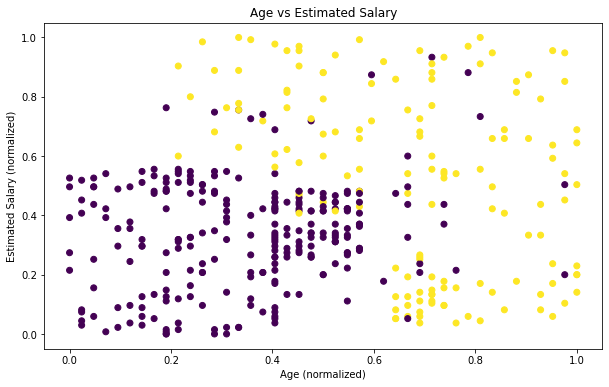

In [33]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.title("Age vs Estimated Salary")
plt.xlabel("Age (normalized)")
plt.ylabel("Estimated Salary (normalized)")

Purple represents "NOT purchased", and yellow represents "purchased". There is a clear boundary between purple dots and yellow dots.

Plot "Age" vs "Purchased" (1 is purchased, and 0 is not purchased).

Text(0, 0.5, 'Purchased or not')

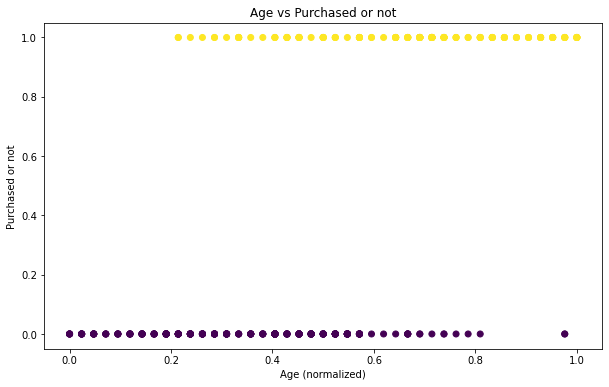

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.title("Age vs Purchased or not")
plt.xlabel("Age (normalized)")
plt.ylabel("Purchased or not")

### Sigmoid function

Define a sigmoid function:

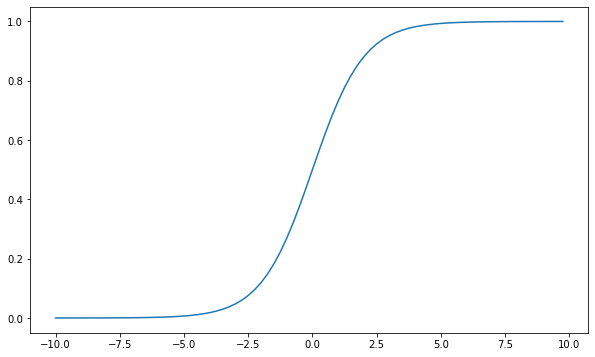

In [35]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))

### Loss function

Define the cross entropy loss (CEL) function:

In [36]:
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0 - y)*np.log(1.0 - y_hat)

Define a function for partial derivatives:

$$
\frac{\partial L}{\partial w_j} = [\sigma(w_j x_j + bias) − y]x_j = [\hat{y} - y]x_j
$$


$$
\frac{\partial L}{\partial b} = \sigma(w_j x_j + bias)−y = \hat{y} - y
$$

Also, define a feed-forward function.

In [46]:
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)

Sample the initial values of w and b from a normal distribution. Set the learning rate $\alpha$ to 0.25.

In [47]:
w = np.random.randn(2)
b = np.random.randn()
alpha = 0.25
feed_forward(X[0], w, b)

0.5989146978677894

Now, let's implement a stochastic gradient descent for 10000 times.

In [48]:
# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        # w -= alpha*dw
        # b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 296.6435226305866
Total Loss at time 1001 = 151.33770301018671
Total Loss at time 2001 = 142.52339926778114
Total Loss at time 3001 = 140.1381866756639
Total Loss at time 4001 = 139.25193362455852
Total Loss at time 5001 = 138.8729234070284
Total Loss at time 6001 = 138.69783095605928
Total Loss at time 7001 = 138.61304675888792
Total Loss at time 8001 = 138.57072248576824
Total Loss at time 9001 = 138.54915699812813


Define a prediction function:

In [49]:
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0 - y_hat])

Compute the classification percentage:

### Outcome

In [50]:
hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
    # print(f"Prediction: {y_hat}")
    # print(f"True label: {y}")
    # print()
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Classification Percentage = 79.25%


We see that the classification percentage is 79.25%, which is relatively accurate.

---
# References

Logistic regression. Wikipedia. https://en.wikipedia.org/wiki/Logistic_regression

Pant, Ayush. Introduction to logistic regression. Jan 2019. https://towardsdatascience.com/